In [1]:
import boto3
import pandas as pd

dynamodb = boto3.resource("dynamodb")
table = dynamodb.Table("EnergySiteData")

def fetchalldata():
    response = table.scan()
    data = response['Items']
    return pd.DataFrame(data)

In [2]:
df = fetchalldata()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   anomaly               310 non-null    bool  
 1   energy_consumed_kwh   310 non-null    object
 2   site_id               310 non-null    object
 3   energy_generated_kwh  310 non-null    object
 4   net_energy_kwh        310 non-null    object
 5   timestamp             310 non-null    object
dtypes: bool(1), object(5)
memory usage: 12.5+ KB


In [3]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['energy_generated_kwh'] = pd.to_numeric(df['energy_generated_kwh'])
df['energy_consumed_kwh'] = pd.to_numeric(df['energy_consumed_kwh'])
df['net_energy_kwh'] = pd.to_numeric(df['net_energy_kwh'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   anomaly               310 non-null    bool               
 1   energy_consumed_kwh   310 non-null    float64            
 2   site_id               310 non-null    object             
 3   energy_generated_kwh  310 non-null    float64            
 4   net_energy_kwh        310 non-null    float64            
 5   timestamp             310 non-null    datetime64[ns, UTC]
dtypes: bool(1), datetime64[ns, UTC](1), float64(3), object(1)
memory usage: 12.5+ KB


In [4]:
import matplotlib.pyplot as plt

agg_df = df.groupby('site_id')[['energy_generated_kwh' , 'energy_consumed_kwh']].sum().reset_index()
agg_df.head()

,site_id,energy_generated_kwh,energy_consumed_kwh
0,site_id001,242.93,302.34
1,site_id002,399.59,265.63
2,site_id003,281.29,456.55
3,site_id004,277.91,406.72
4,site_id005,119.66,139.63


<Figure size 1600x800 with 0 Axes>

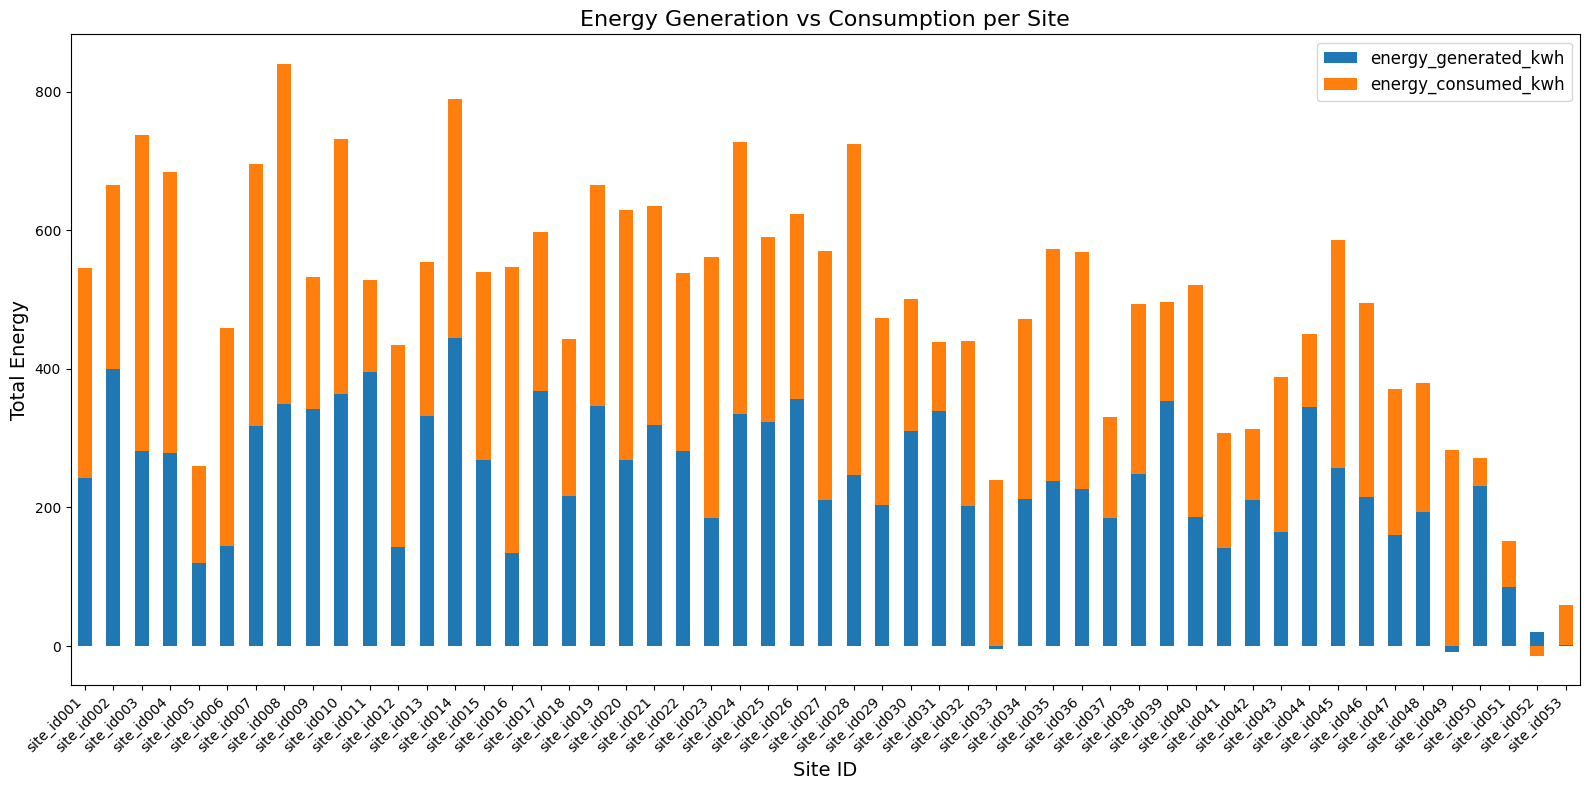

In [6]:
plt.figure(figsize=(16,8))
agg_df.set_index('site_id').plot(kind='bar', stacked=True, figsize=(16,8))

plt.title('Energy Generation vs Consumption per Site', fontsize=16)
plt.ylabel('Total Energy', fontsize=14)
plt.xlabel('Site ID', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

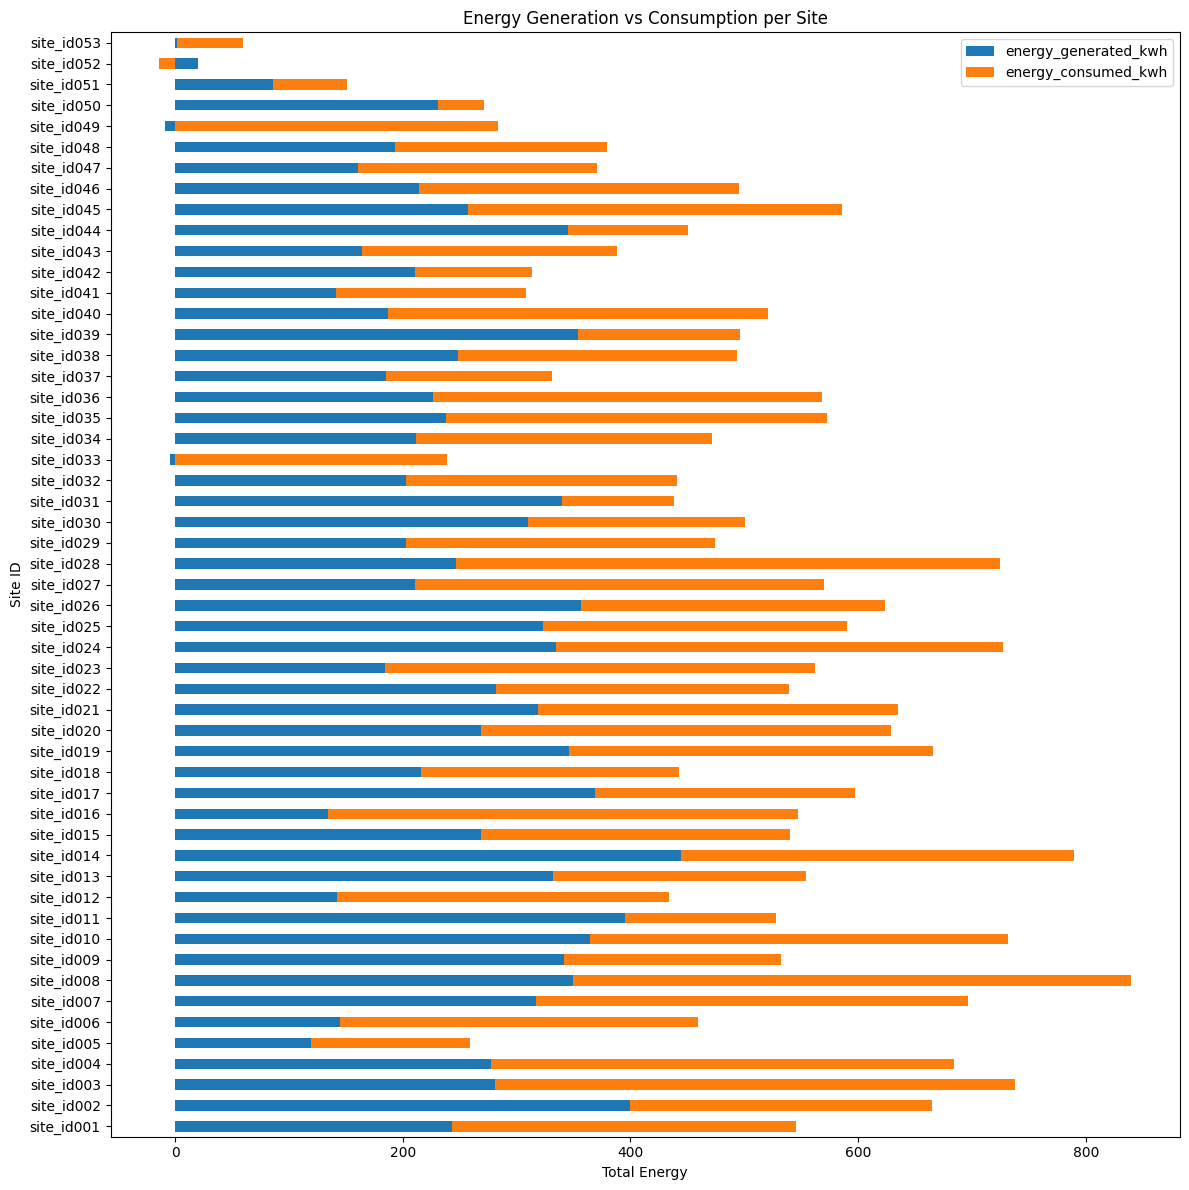

In [7]:
agg_df.set_index('site_id').plot(kind='barh', stacked=True, figsize=(12, 12))
plt.title('Energy Generation vs Consumption per Site')
plt.xlabel('Total Energy')
plt.ylabel('Site ID')
plt.tight_layout()
plt.show()

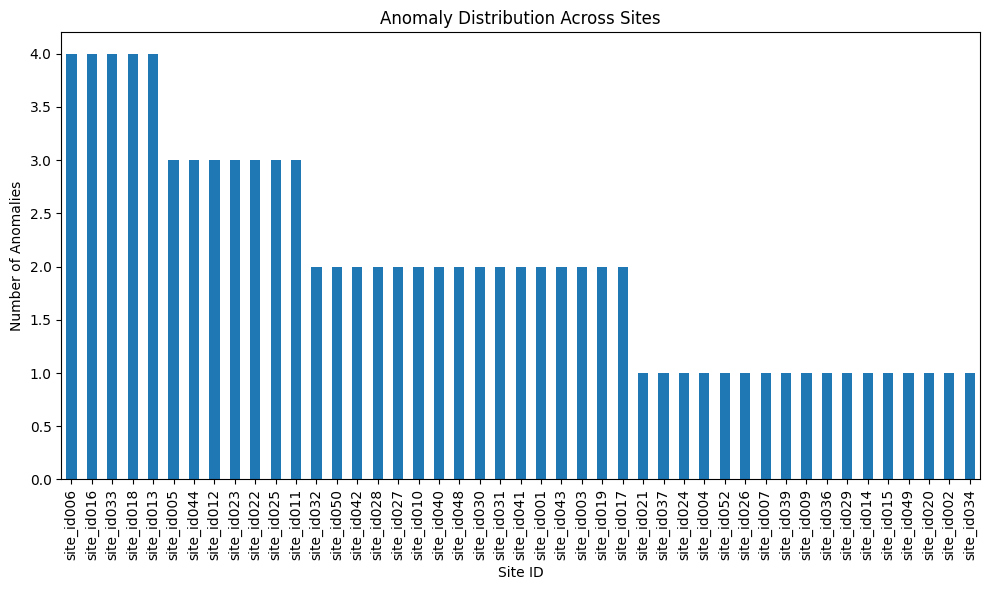

In [10]:
anomaly_df = df[df['anomaly'] == True]
anomaly_count = anomaly_df['site_id'].value_counts()

plt.figure(figsize=(10,6))
anomaly_count.plot(kind='bar')
plt.title('Anomaly Distribution Across Sites')
plt.ylabel('Number of Anomalies')
plt.xlabel('Site ID')
plt.tight_layout()
plt.show()

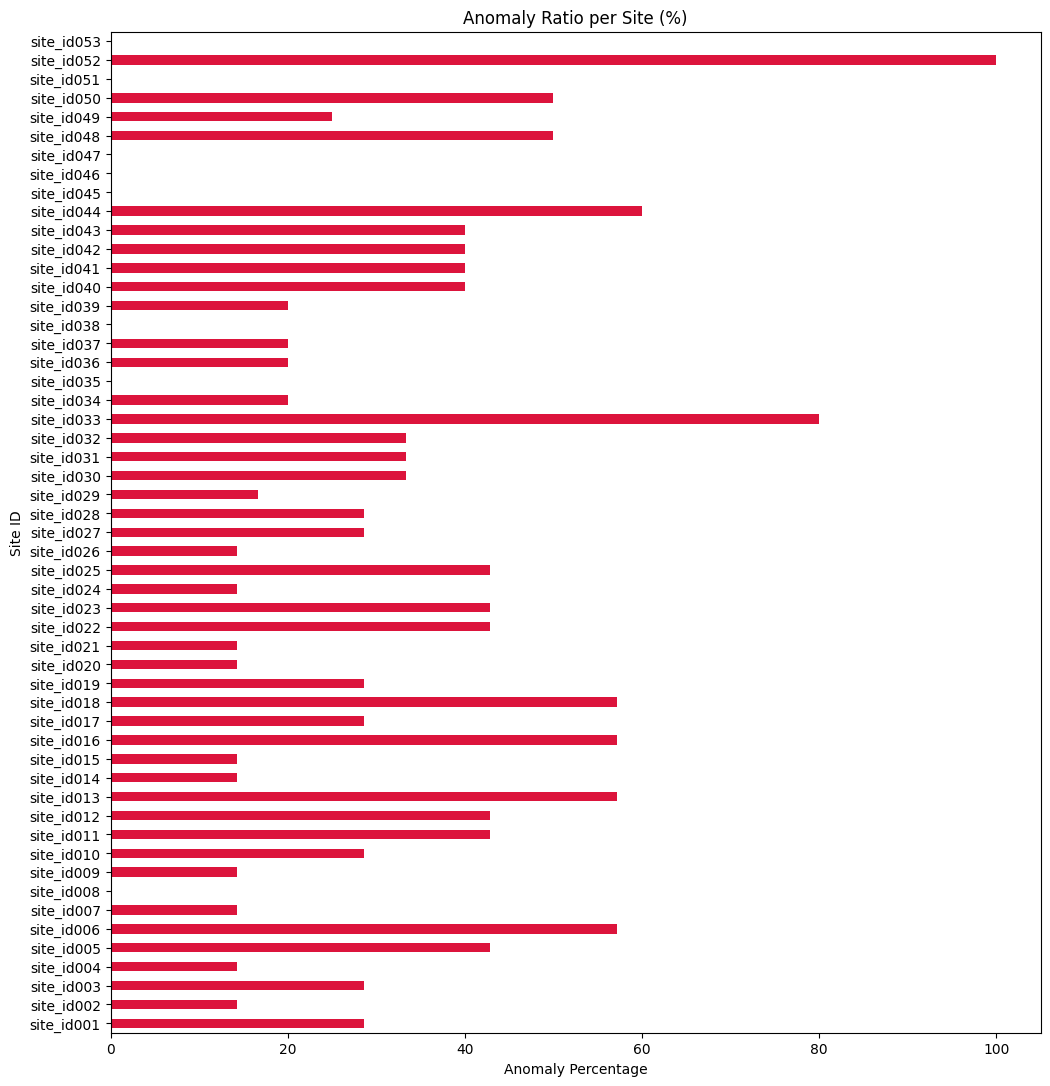

In [12]:
total_counts = df.groupby('site_id').size()
anomaly_ratio = (anomaly_count / total_counts * 100)

plt.figure(figsize=(12,13))
anomaly_ratio.plot(kind='barh', color='crimson')
plt.title('Anomaly Ratio per Site (%)')
plt.ylabel('Site ID')
plt.xlabel('Anomaly Percentage')
plt.show()

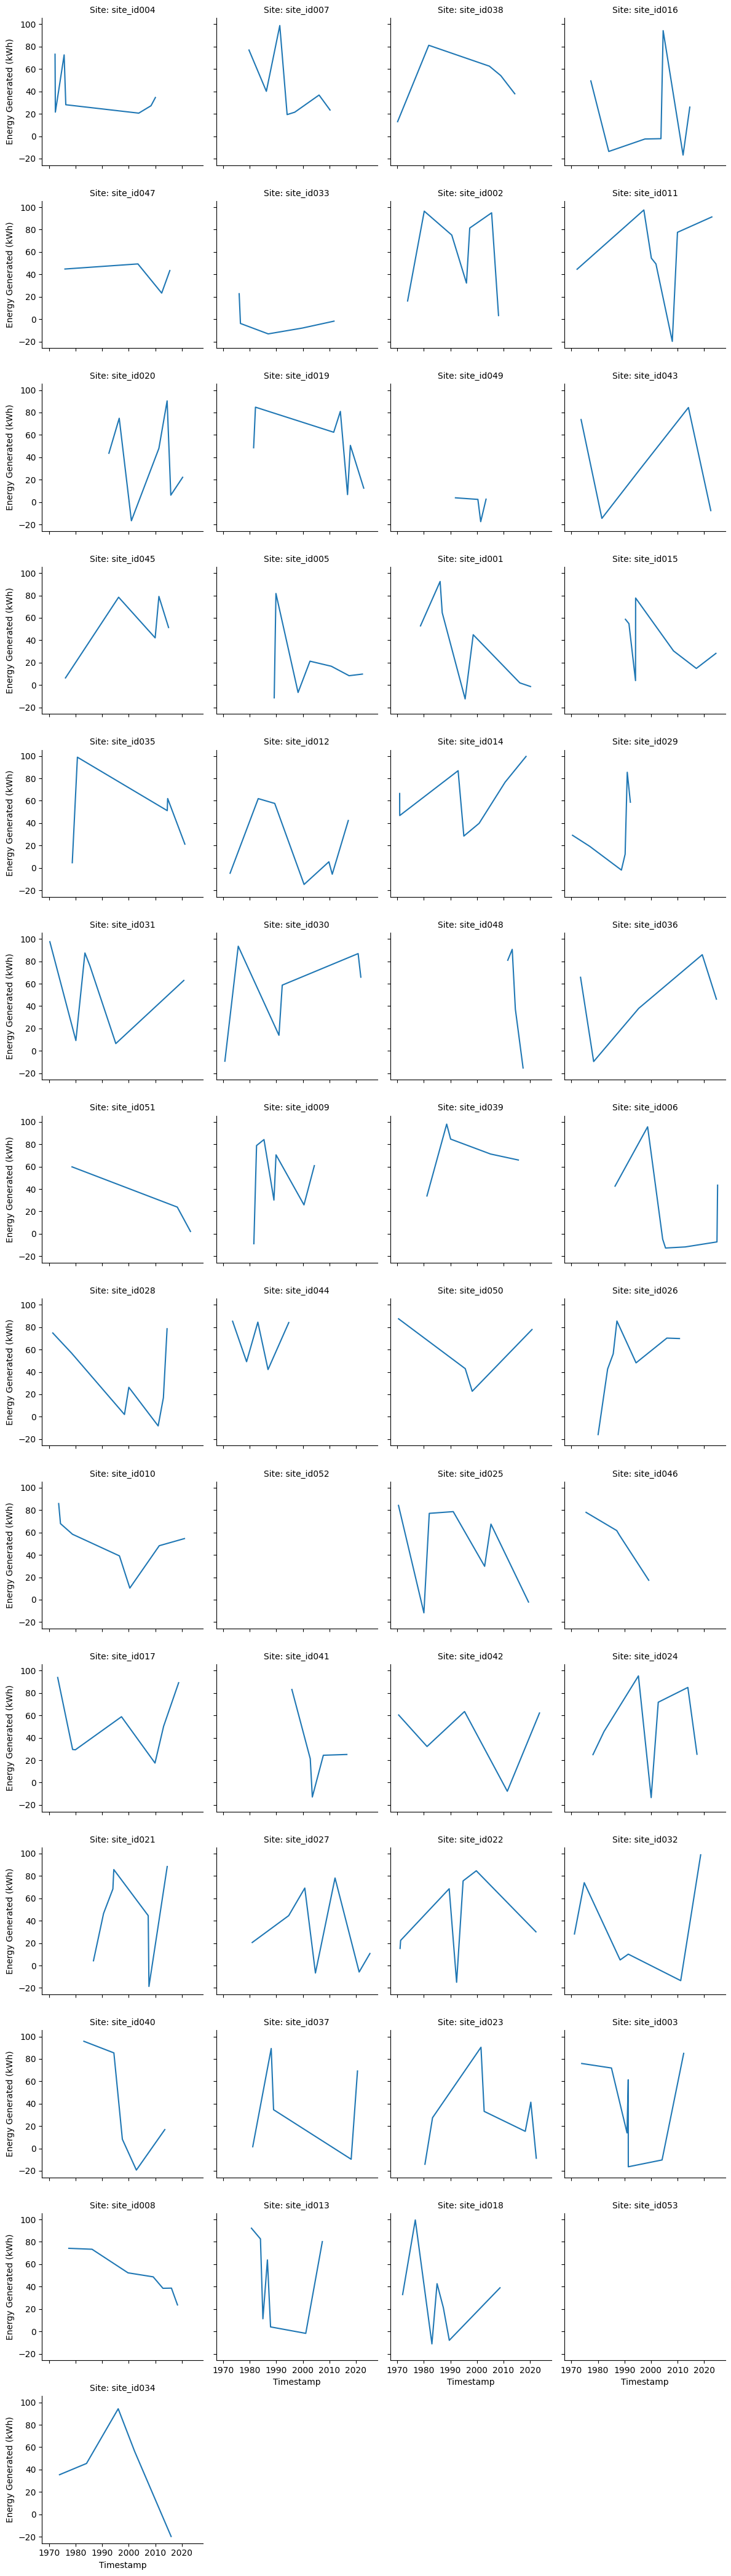

In [15]:
import seaborn as sns
g = sns.FacetGrid(df, col="site_id", col_wrap=4, height=3, sharey=True)
g.map_dataframe(sns.lineplot, x="timestamp", y="energy_generated_kwh")
g.set_titles(col_template="Site: {col_name}")
g.set_axis_labels("Timestamp", "Energy Generated (kWh)")
plt.tight_layout()
plt.show()

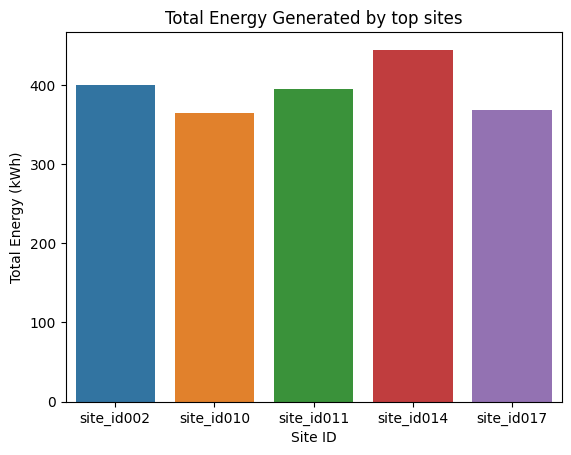

In [17]:
sns.barplot(data=df_top.groupby('site_id')['energy_generated_kwh'].sum().reset_index(),
            x='site_id', y='energy_generated_kwh')
plt.title('Total Energy Generated by top sites')
plt.ylabel('Total Energy (kWh)')
plt.xlabel('Site ID')
plt.show()

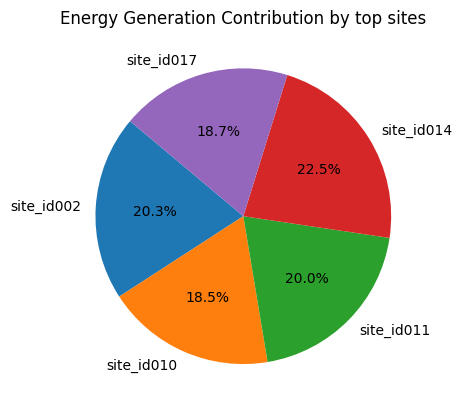

In [18]:
df_sum = df_top.groupby('site_id')['energy_generated_kwh'].sum()

plt.pie(df_sum, labels=df_sum.index, autopct='%1.1f%%', startangle=140)
plt.title('Energy Generation Contribution by top sites')
plt.show()

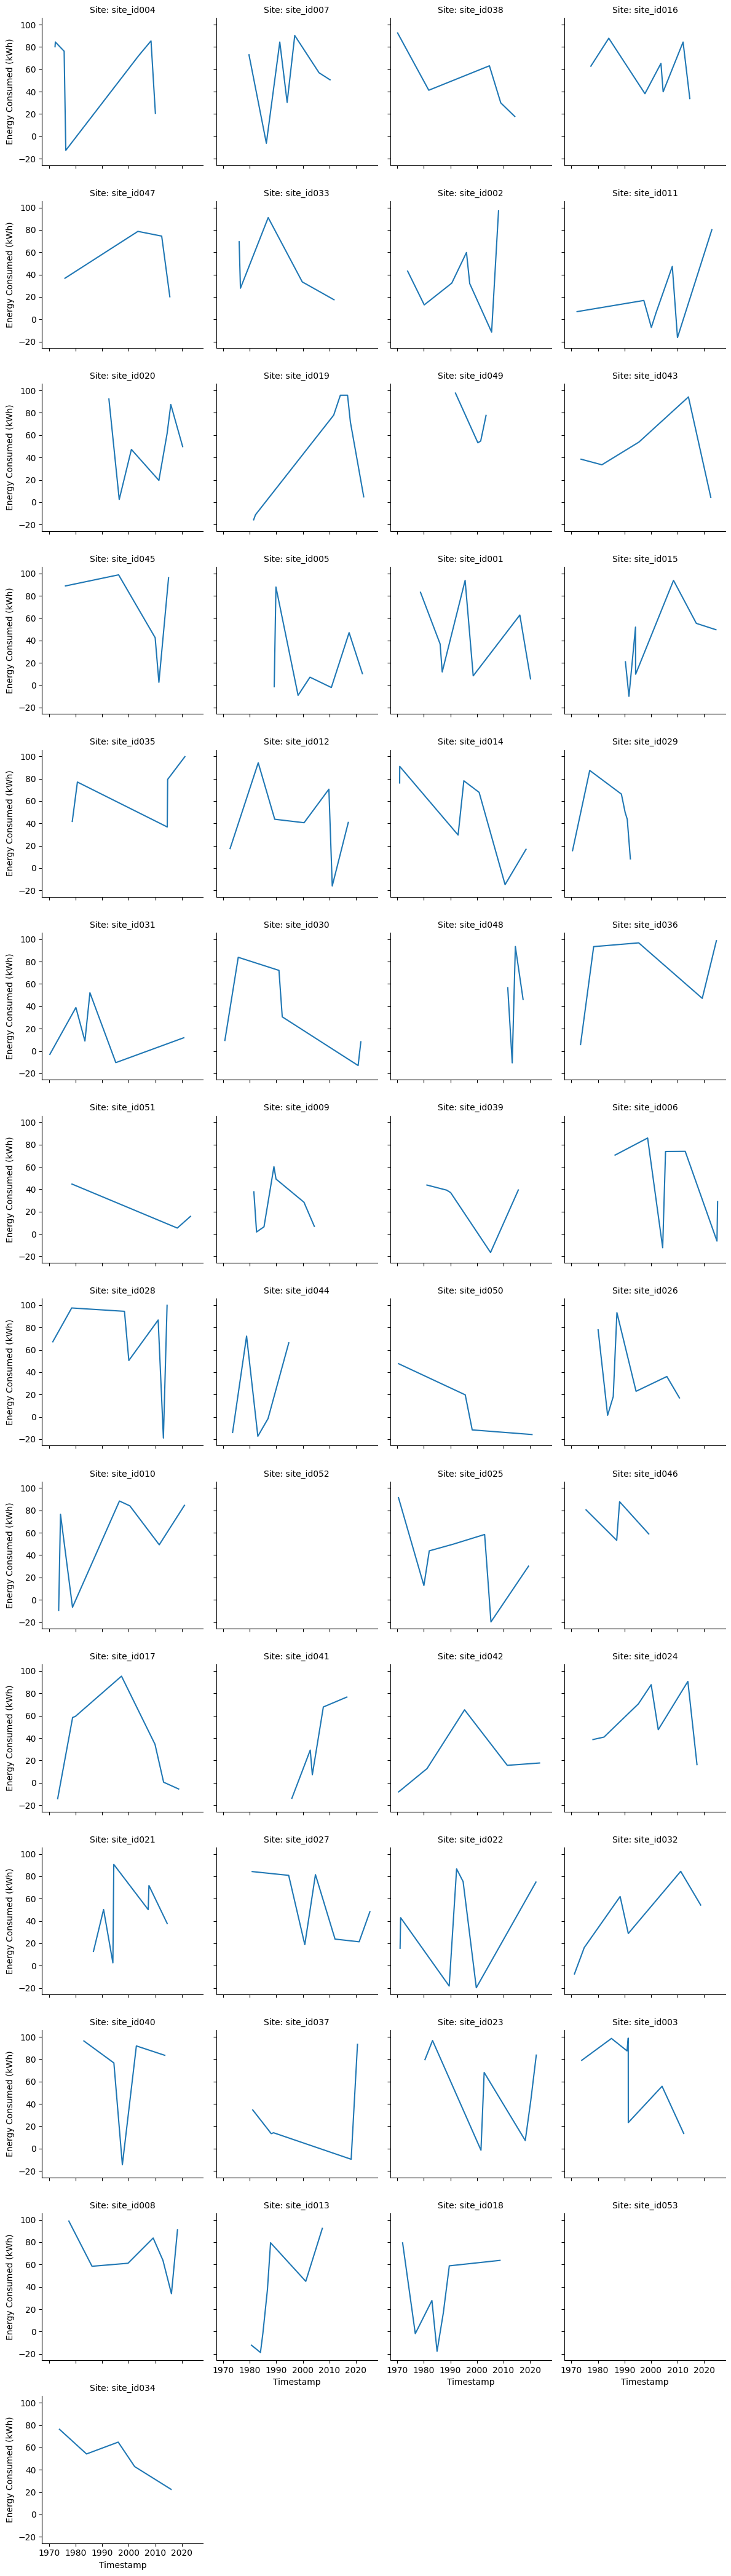

In [22]:
import seaborn as sns
g = sns.FacetGrid(df, col="site_id", col_wrap=4, height=3, sharey=True)
g.map_dataframe(sns.lineplot, x="timestamp", y="energy_consumed_kwh")
g.set_titles(col_template="Site: {col_name}")
g.set_axis_labels("Timestamp", "Energy Consumed (kWh)")
plt.tight_layout()
plt.show()

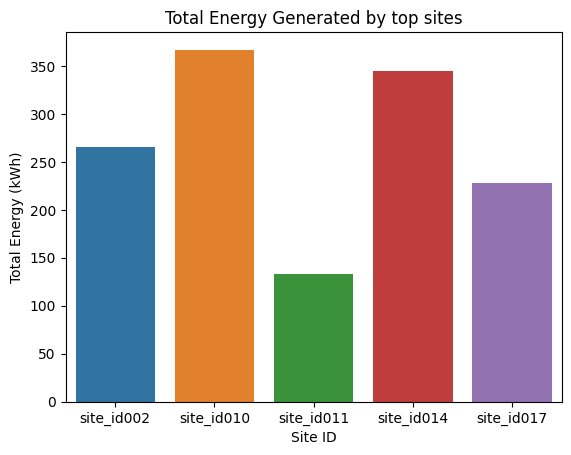

In [21]:
sns.barplot(data=df_top.groupby('site_id')['energy_consumed_kwh'].sum().reset_index(),
            x='site_id', y='energy_consumed_kwh')
plt.title('Total Energy Consumed by top sites')
plt.ylabel('Total Energy (kWh)')
plt.xlabel('Site ID')
plt.show()

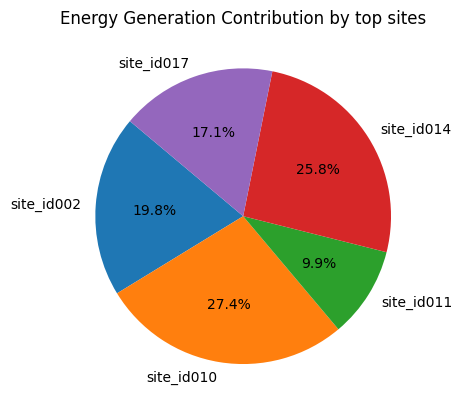

In [23]:
df_sum = df_top.groupby('site_id')['energy_consumed_kwh'].sum()

plt.pie(df_sum, labels=df_sum.index, autopct='%1.1f%%', startangle=140)
plt.title('Energy Generation Contribution by top sites')
plt.show()

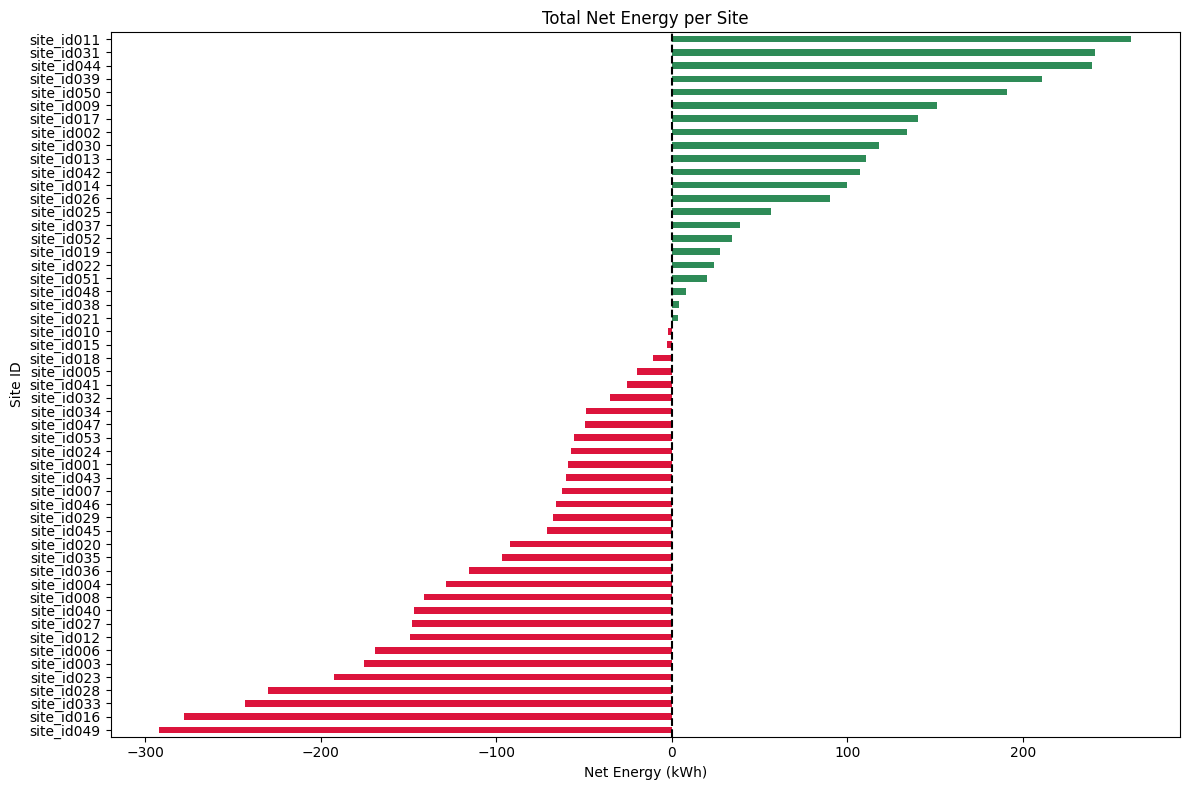

In [24]:
net_energy = df.groupby('site_id')['net_energy_kwh'].sum().sort_values()

plt.figure(figsize=(12, 8))
net_energy.plot(kind='barh', color=['crimson' if val < 0 else 'seagreen' for val in net_energy])
plt.xlabel('Net Energy (kWh)')
plt.ylabel('Site ID')
plt.title('Total Net Energy per Site')
plt.axvline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()